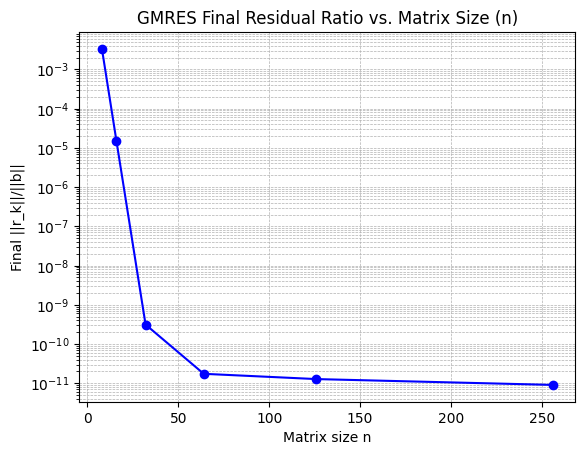

In [1]:
import matplotlib.pyplot as plt

# ||r||/||b|| ratios from GRSE
n_values = [8, 16, 32, 64, 126, 256]
final_ratios = [3.321977e-03, 1.475407e-05, 3.129608e-10, 1.740402e-11, 1.277147e-11, 9.067258e-12]

# semi-log plot (y-axis on logarithmic scale)
plt.semilogy(n_values, final_ratios, marker='o', linestyle='-', color='blue')

plt.xlabel('Matrix size n')
plt.ylabel('Final ||r_k||/||b||')
plt.title('GMRES Final Residual Ratio vs. Matrix Size (n)')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Serial implementation of GMRES

We see that as the matrix A's size increases as well as b, with the number of iterations half the size of n, the relative residual decreases. This is expected as for lower $n$, we are finding the least squares estimate to the system in a lower dimensional Krylov Subspace which doesn't closely reflect the true relationship between A and b as well as a higher dimensional approach does. The improvement levels off as roundoff errors dominate.

Parallel implementation of GMRES.

In Par_GMRES.c, I have added parallelization to the inner loops in the Arnoldi iterations. I also parallelize dot product computation and matrix-vector multiplication operations. The Arnoldi iteration is mostly sequential so parallelization of this is limited to the inner loop where we orthogonalize v against all previous q vectors. One could potentially parallelize the least squares update stage in the GMRES algorithm also for large n.

A robust stopping criterion for the algorithm would be to consider the relative residual size compared to a desired tolerance:

||r_{k}||_{2} / ||b|| < tol

This takes into account the scale of the right-hand side b, so the algorithm stops when the error is small relative to the problem size and further iterations see diminishing marginal gains relative to computational cost.